In [2]:
import pyxdf
from utils import sync_streams, combine_streams

Group 10:

Task Begin: Immediately after Chris says "start my timer right now."
Task End: Immediately before Chris says "all right your time is up"

CSL_Laptop
Start OBS Vid  UNIX timestamp: 1736520352.415
Task Beginning UNIX timestamp: 1736520529.372 (176 sec in)
Task End       UNIX timestamp: 1736524148.489 (3796 sec in)

HCI_Lab1 [manually calculated task end by taking the diff between beginning and end from CSL_Laptop and adding it to task beginning of HCI_Lab1]
Start OBS Vid  UNIX timestamp: 1736520332.182
Task Beginning UNIX timestamp: 1736520517.282 (185 sec in)
Task End       UNIX timestamp: 1736524136.399 (not found)

HCI_Lab2
Start OBS Vid  UNIX timestamp: 1736520353.980
Task Beginning UNIX timestamp: 1736520516.456 (162 sec in)
Task End       UNIX timestamp: 1736524135.900 (3781 sec in)

In [3]:
group_num = 10
WPI_xdf_path = f"../Group {group_num}/HCILab-Group10.xdf"
CSL_xdf_path = f"../Group {group_num}/CSL_Laptop_Group10.xdf"
WPI_data_streams, WPI_header = pyxdf.load_xdf(WPI_xdf_path)
CSL_data_streams, CSL_header = pyxdf.load_xdf(CSL_xdf_path)
task_start_UNIX_times = {
    "OBS_HCILab1": 1736520517.282,
    "OBS_HCILab2": 1736520516.456,
    "OBS_CSL_Laptop": 1736520529.372
}
task_duration = 1736524148.489 - 1736520529.372
task_duration

3619.117000102997

length of EEG stream: 1000643
start_EEG_index: 51769, end_EEG_index: 956548
padded_start_EEG_index: 42769, padded_end_EEG_index: 965548
For EEG Stream Unicorn_HCILab1, start cutoff index is + 9000 and end cutoff index is 913779

length of EEG stream: 201789
start_EEG_index: 45770, end_EEG_index: 950549
padded_start_EEG_index: 36770, padded_end_EEG_index: 959549
[cut short] For EEG Stream Unicorn_HCILab2, start cutoff index is 9000 and end cutoff index is 128249

length of EEG stream: 974580
start_EEG_index: 48068, end_EEG_index: 952847
padded_start_EEG_index: 39068, padded_end_EEG_index: 961847
For EEG Stream Unicorn_CSL_Laptop, start cutoff index is + 9000 and end cutoff index is 913779



/Users/henryhuang/3rd Year/research/brain-hci/EEG-sync/virtual_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


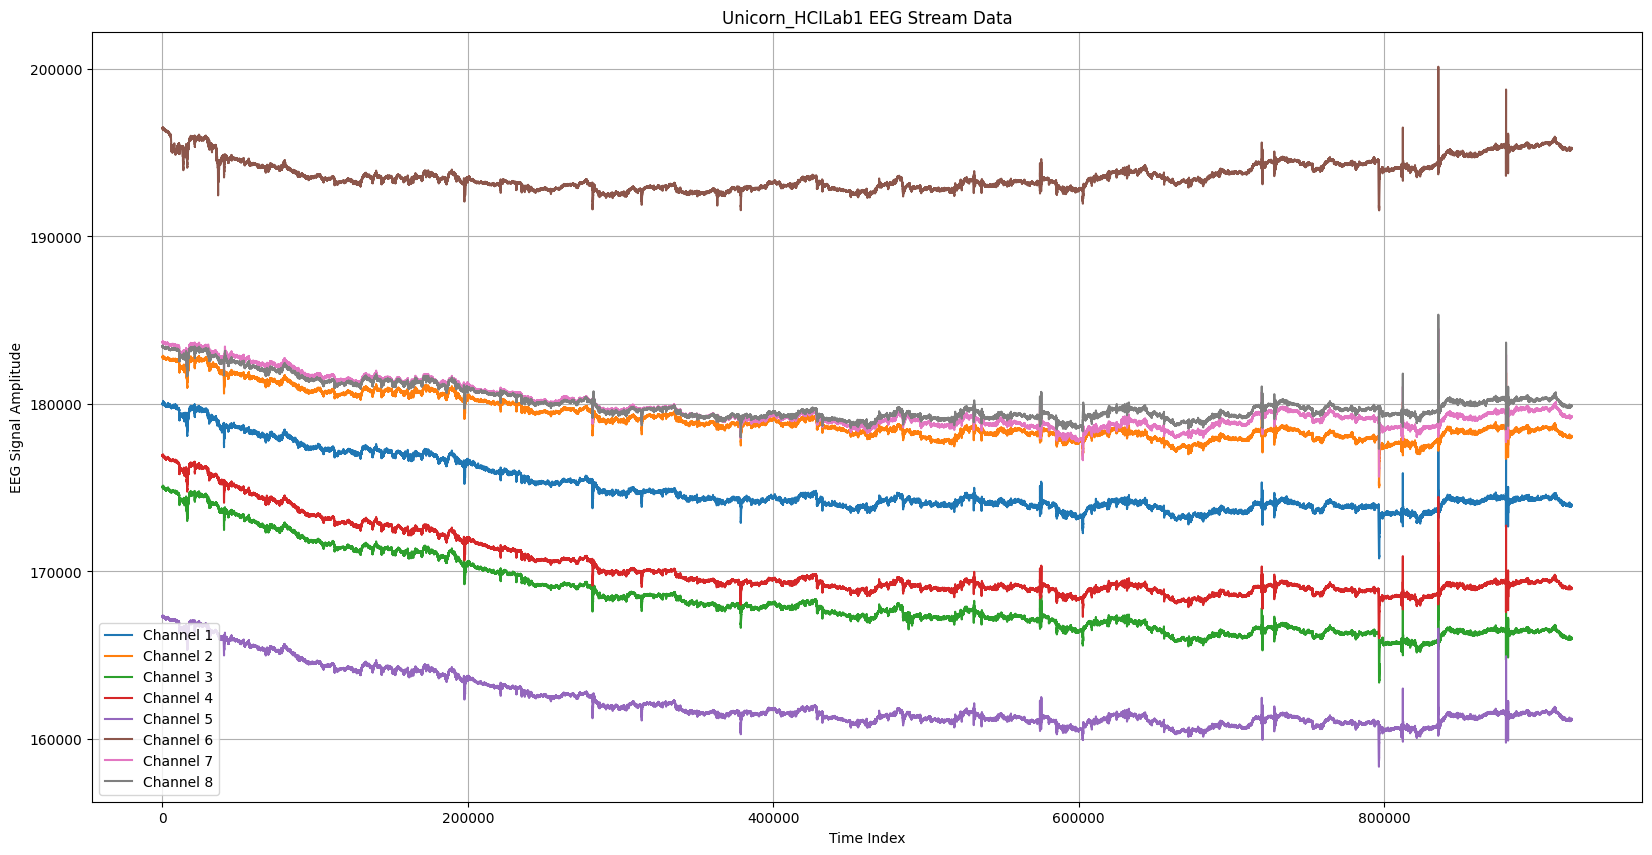

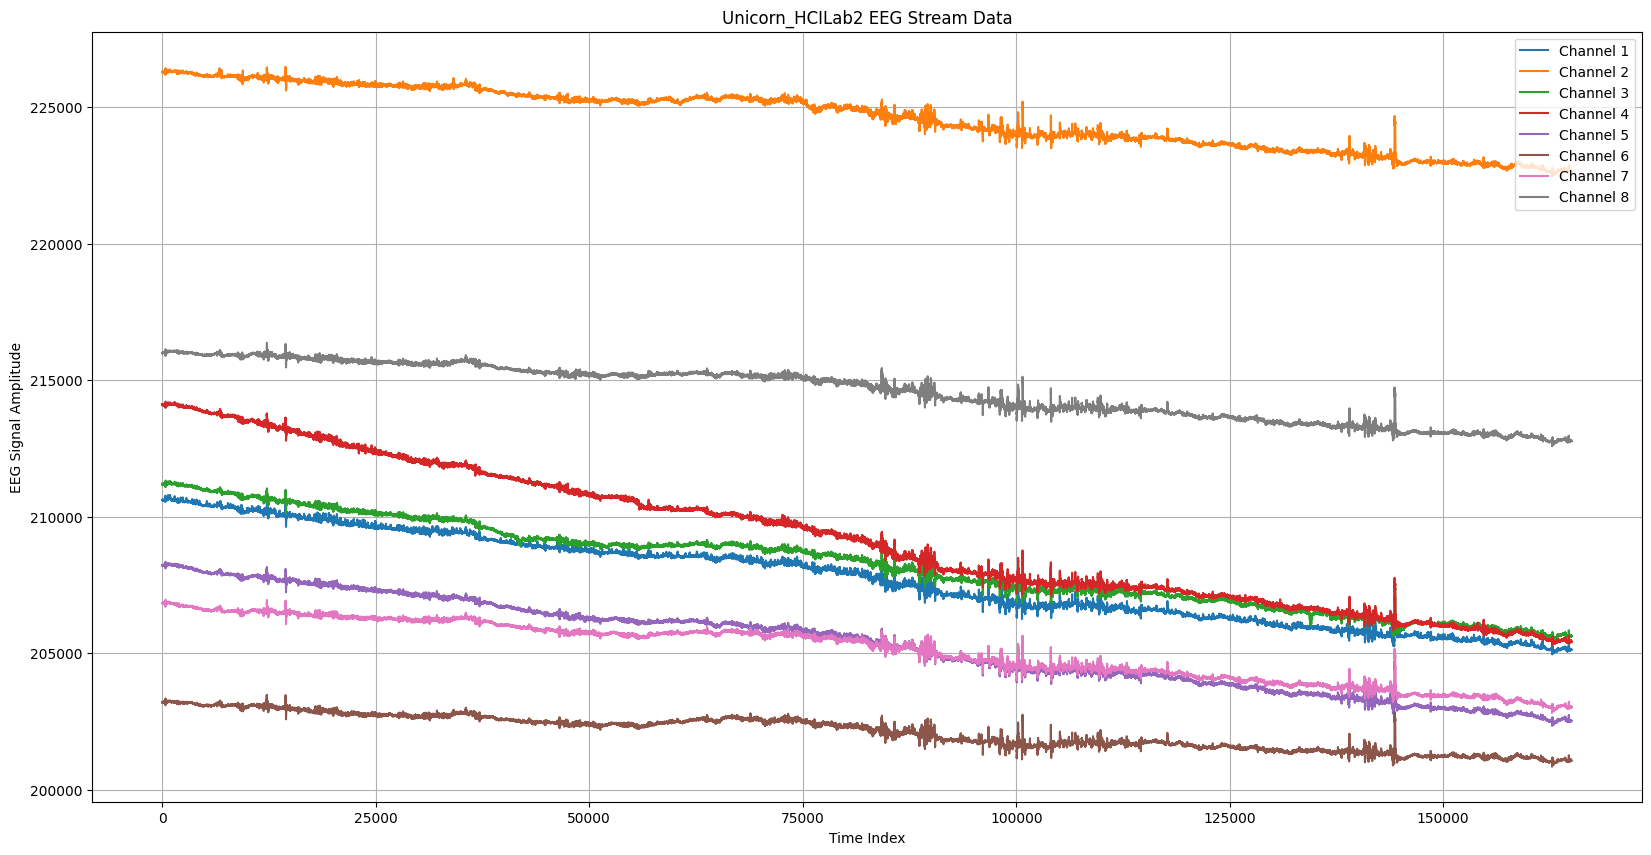

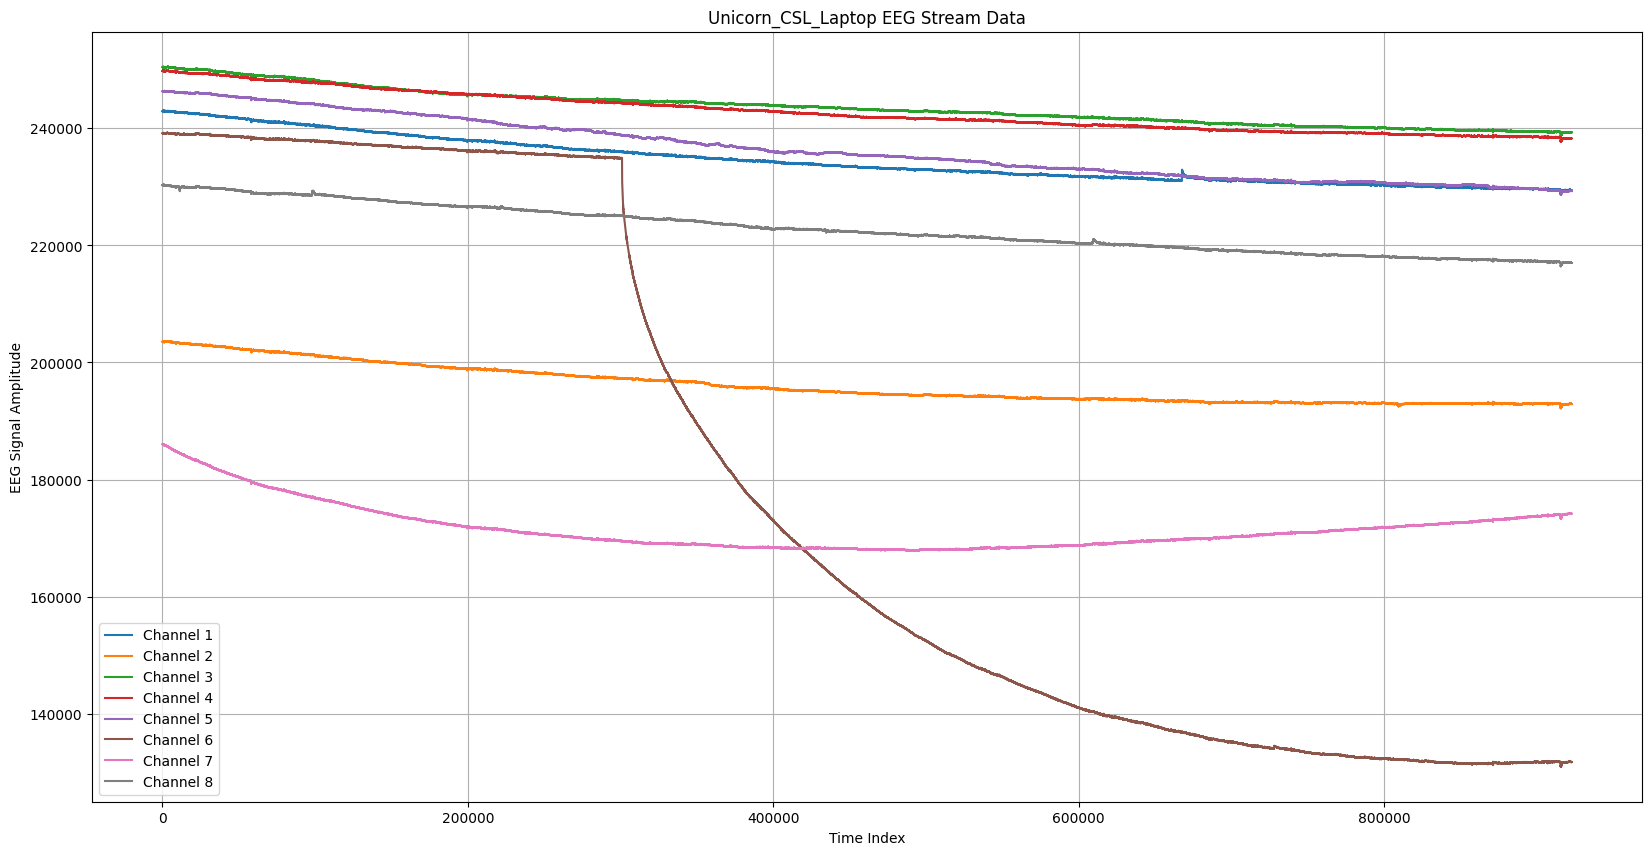

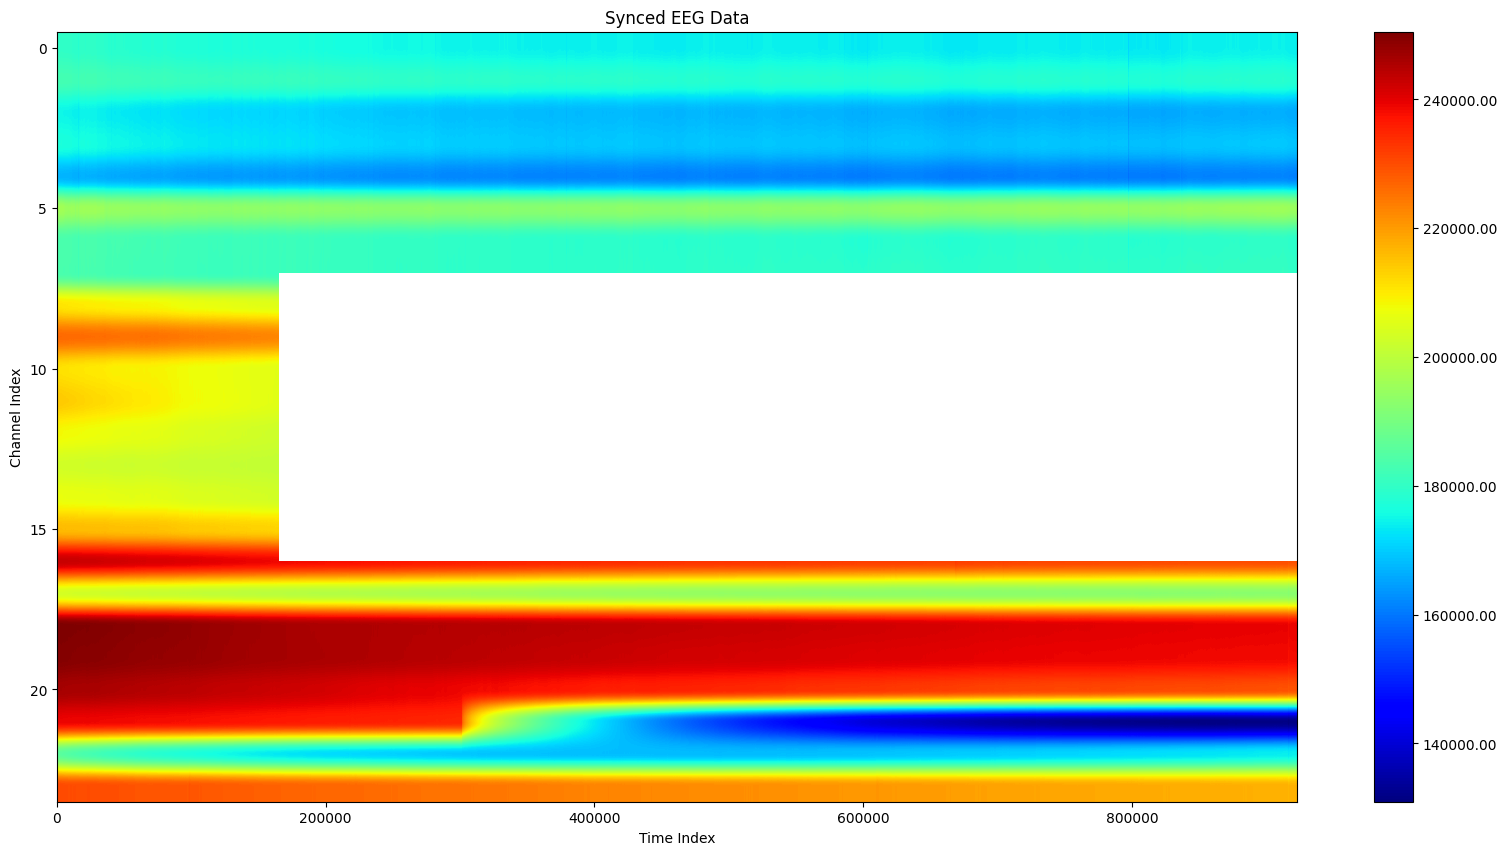

Min: 130948.859375
Max: 250521.125
Mean: 197019.8514813559
Standard Deviation: 29738.735241889768


In [4]:
# Sync the streams based on the shared stream's timestamp
streams = sync_streams(WPI_data_streams, CSL_data_streams, task_start_UNIX_times, task_duration)
combine_streams(group_num, streams)